In [1]:
%matplotlib notebook
%reset -f


import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import preprocessing
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

### Função utilitária para fazer a regressão com constante adicionada
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
# Fonte: 

df = pd.read_excel("jogo.xlsx")

In [4]:
deletar = df.loc[((df.Global_Sales.fillna(0)) == 0) & ((df.Total_Shipped.fillna(0)) == 0)]
a = deletar.index
dados = df.drop(a)

In [5]:
dados["Sales"] = dados["Global_Sales"].fillna(0) + dados["Total_Shipped"].fillna(0)

In [6]:


dados = dados.drop(columns = ["Global_Sales","Total_Shipped","url","status","img_url","NA_Sales" ,"PAL_Sales","JP_Sales" ,"Other_Sales","VGChartz_Score"])


In [7]:
dados = dados.fillna(0)

# Limpeza da Base de Dados
**Só vão ser usadas as linhas que possuem todas as informações relevantes para a regressão**

In [8]:
dados = dados.loc[((dados.Sales != 0 ) & (dados.Critic_Score != 0))]
data = dados


# Análise Exploratória

0.26345550388471317

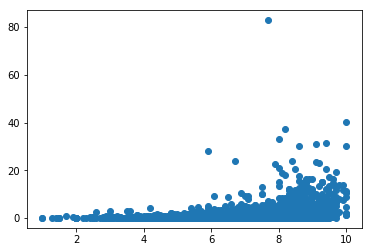

In [9]:
plt.scatter(dados.Critic_Score,dados.Sales);
dados.Critic_Score.corr(dados.Sales)

In [10]:
dados.Genre.values

array(['Sports', 'Platform', 'Racing', ..., 'Puzzle', 'Simulation',
       'Puzzle'], dtype=object)

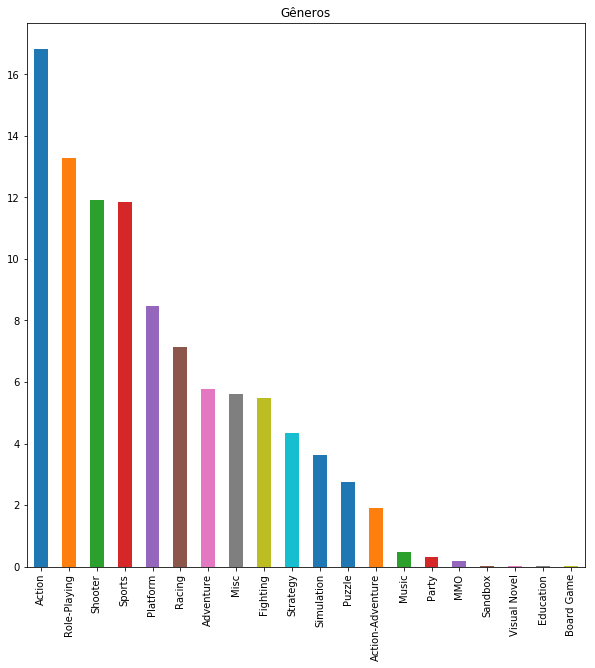

In [11]:
generos = dados.Genre.value_counts(True)*100
generos
plot = generos.plot(kind="bar",title="Gêneros",figsize = (10,10))

In [12]:
quantitativas = ['Rank', 'Critic_Score',
       'User_Score','Vgchartzscore','Sales','Year']

In [13]:
dados.Genre = dados.Genre.astype('category')
dados.ESRB_Rating = dados.ESRB_Rating.astype('category')
dados.Platform = dados.Platform.astype('category')
dados.Publisher = dados.Publisher.astype('category')
dados.Developer = dados.Developer.astype('category')


In [14]:
dataset = dados.loc[:,quantitativas]

In [15]:
x_vars = ['Critic_Score',
       'User_Score','Vgchartzscore','Sales']
y_vars = x_vars

In [16]:
sns.set(style="ticks")

#sns.pairplot(dados, hue="Genre", x_vars=x_vars, y_vars=y_vars);

In [17]:
#sns.pairplot(dados, hue="Genre", kind="reg", x_vars=x_vars, y_vars=y_vars);

# Separação das variaveis e primeiras regressões lineares

In [18]:
from sklearn.model_selection import train_test_split
dados_sales,teste, y_train, y_test = train_test_split(data,data.Sales, test_size=0.25, random_state=RANDOM_SEED)


qualitativas = ['Genre', 'ESRB_Rating', 'Platform',
       'Publisher', 'Developer']
quantitativas = ['Rank', 'Critic_Score',
       'User_Score','Vgchartzscore','Sales','Year']


**Regressão para Cópias Vendidas**

In [19]:
# Separaremos as preditoras
quant_sales = quantitativas.copy()
quant_sales.remove('Sales')
np.asarray(dados);

In [20]:
results_quantitativas_sales = regress(((dados_sales.loc[:, quant_sales]).fillna(0)).astype(float), y_train)

In [21]:
results_quantitativas_sales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     168.3
Date:                Tue, 19 Nov 2019   Prob (F-statistic):          6.21e-161
Time:                        09:33:18   Log-Likelihood:                -8366.6
No. Observations:                3529   AIC:                         1.675e+04
Df Residuals:                    3523   BIC:                         1.678e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            51.0683     17.964      2.843      0.004      15.846      86.290
Rank             -0.0002   9.17e-06    -20.728      0.000      -0.000      -0.000
Critic_Score      0.2185      0.033      6.581      0.000       0.153       0.284
User_Score        0.2138      0.027      7.968      0.000       0.161       0.266
Vgchartzscore     0.0199      0.020      0.985      0.325      -0.020       0.059
Year             -0.0251      0.009     -2.804      0.005      -0.043      -0.008
==============================================================================
Omnibus:                     6442.384   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13791272.896
Skew:                          13.086   Prob(JB):                         0.00
Kurtosis:                     308.134   Cond. No.                     3.52e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
quant_sales2 = quant_sales.copy()
quant_sales2.remove('Vgchartzscore')

In [23]:
results_quantitativas_sales_2 = regress(((dados_sales.loc[:, quant_sales2]).fillna(0)).astype(float), y_train)

In [24]:
results_quantitativas_sales_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     210.2
Date:                Tue, 19 Nov 2019   Prob (F-statistic):          6.52e-162
Time:                        09:33:21   Log-Likelihood:                -8367.1
No. Observations:                3529   AIC:                         1.674e+04
Df Residuals:                    3524   BIC:                         1.678e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           48.9976     17.841      2.746      0.006      14.018      83.977
Rank            -0.0002   9.14e-06    -20.853      0.000      -0.000      -0.000
Critic_Score     0.2215      0.033      6.697      0.000       0.157       0.286
User_Score       0.2215      0.026      8.629      0.000       0.171       0.272
Year            -0.0240      0.009     -2.707      0.007      -0.041      -0.007
==============================================================================
Omnibus:                     6441.592   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13767571.334
Skew:                          13.083   Prob(JB):                         0.00
Kurtosis:                     307.870   Cond. No.                     3.50e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Regressão para Nota dos críticos**

In [25]:
dados_score,teste, y_train_score, y_test = train_test_split(data,data.Critic_Score, test_size=0.25, random_state=RANDOM_SEED)
quant_score = quantitativas.copy()
quant_score.remove('Critic_Score')


In [26]:
results_quantitativas_score = regress(((dados_score.loc[:, quant_score]).fillna(0)).astype(float), y_train_score)
results_quantitativas_score.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Critic_Score   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     143.2
Date:                Tue, 19 Nov 2019   Prob (F-statistic):          1.11e-138
Time:                        09:33:34   Log-Likelihood:                -5950.2
No. Observations:                3529   AIC:                         1.191e+04
Df Residuals:                    3523   BIC:                         1.195e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            32.8216      9.052      3.626      0.000      15.074      50.569
Rank          -8.671e-05   4.67e-06    -18.555      0.000   -9.59e-05   -7.76e-05
User_Score        0.0429      0.014      3.147      0.002       0.016       0.070
Vgchartzscore     0.0530      0.010      5.233      0.000       0.033       0.073
Sales             0.0556      0.008      6.581      0.000       0.039       0.072
Year             -0.0125      0.005     -2.775      0.006      -0.021      -0.004
==============================================================================
Omnibus:                      376.130   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              525.613
Skew:                          -0.834   Prob(JB):                    7.32e-115
Kurtosis:                       3.891   Cond. No.                     3.52e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regressão com Dummy para quantidade de cópias vendidas

In [27]:
def dummify(data, column_name):
    """
        Converte a coluna column_name em dummies / one-hot e as adiciona ao dataframe
        retorna uma copia do  df original *sem* a coluna que foi dummified
    """
    df = data.copy()
    # Nota: se você for um econometrista, pode se interessar por usar a opção dropFirst = True na get_dummies
    df2 = pd.concat([df.drop(column_name, axis=1), pd.get_dummies(data[column_name], prefix=column_name)], axis=1)
    return df2

In [28]:
res = dummify(dados, ['Genre', 'ESRB_Rating', 'Platform',
       'Publisher', 'Developer'])
dados_sales,teste_sales, y_train, y_test = train_test_split(res,res.Sales, test_size=0.25, random_state=RANDOM_SEED)


In [29]:
z = res.drop(columns=quantitativas)

In [30]:
quant_sales2.extend(z)
quant_sales2.remove("Rank")
quant_sales2.remove("Name")
quant_sales2.remove("basename")
quant_sales2.remove("Last_Update")

In [32]:
dummy_sales = regress(((dados_sales.loc[:,quant_sales2]).fillna(0)).astype(float), y_train)

In [33]:
dummy_sales.summary()


C:\Users\gabri\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\gabri\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\gabri\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\gabri\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     2.120
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           2.79e-53
Time:                        09:35:57   Log-Likelihood:                -7485.6
No. Observations:                3529   AIC:                         1.730e+04
Df Residuals:                    2366   BIC:                         2.447e+04
Df Model:                        1162                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      92.5394     43.778      2.114      0.035       6.692     178.386
Critic_Score                                                                0.3433      0.049      7.044      0.000       0.248       0.439
User_Score                                                                  0.1816      0.030      6.090      0.000       0.123       0.240
Year                                                                       -0.0590      0.028     -2.140      0.032      -0.113      -0.005
Genre_Action                                                                5.1290      2.337      2.195      0.028       0.547       9.711
Genre_Action-Adventure                                                      5.2747      2.383      2.214      0.027       0.602       9.947
Genre_Adventure                                                             4.2871      2.334      1.837      0.066      -0.290       8.864
Genre_Board Game                                                            5.0445      4.214      1.197      0.231      -3.218      13.307
Genre_Education                                                             2.0172      3.359      0.601      0.548      -4.569       8.604
Genre_Fighting                                                              5.8745      2.342      2.509      0.012       1.283      10.466
Genre_MMO                                                                   5.1946      2.727      1.905      0.057      -0.153      10.543
Genre_Misc                                                                  4.9692      2.355      2.110      0.035       0.352       9.587
Genre_Music                                                                 3.6882      2.522      1.462      0.144      -1.258       8.634
Genre_Party                                                                 5.2184      2.492      2.094      0.036       0.331      10.106
Genre_Platform                                                              5.5047      2.330      2.362      0.018       0.935      10.074
Genre_Puzzle                                                                4.0636      2.354      1.726      0.084      -0.553       8.680
Genre_Racing                                                                5.8843      2.330      2.526      0.012       1.316      10.453
Genre_Role-Playing                                                          5.2023      2.344      2.219      0.027       0.605       9.799
Genre_Sandbox                                                            1.831e-12   1.02e-12      1.798      0.072   -1.65e-13    3.83e-12
Gen

In [35]:
valorp = dummy_sales.pvalues
deixar = []
pcrit = 0.10
for indice,valor in valorp.items():
    if valor <= pcrit:
        deixar.append(indice)
del(deixar[0])

In [36]:

params_sales_1 = deixar

In [37]:

dummy_sales2 = regress(((dados_sales.loc[:,params_sales_1]).fillna(0)).astype(float), y_train)


In [38]:
dummy_sales2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     36.98
Date:                Tue, 19 Nov 2019   Prob (F-statistic):               0.00
Time:                        09:36:29   Log-Likelihood:                -7683.1
No. Observations:                3529   AIC:                         1.552e+04
Df Residuals:                    3451   BIC:                         1.600e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       36.2533     23.026      1.574      0.115      -8.894      81.400
Critic_Score                                 0.2720      0.028      9.837      0.000       0.218       0.326
User_Score                                   0.1626      0.022      7.339      0.000       0.119       0.206
Year                                        -0.0224      0.013     -1.673      0.094      -0.049       0.004
Genre_Action                                 0.8323      0.568      1.466      0.143      -0.281       1.946
Genre_Action-Adventure                       0.8506      0.618      1.375      0.169      -0.362       2.063
Genre_Adventure                              0.2054      0.582      0.353      0.724      -0.936       1.347
Genre_Fighting                               1.0021      0.581      1.725      0.085      -0.137       2.141
Genre_MMO                                    2.1858      0.994      2.198      0.028       0.236       4.135
Genre_Misc                                   0.8294      0.575      1.443      0.149      -0.298       1.956
Genre_Party                                  1.0724      0.878      1.222      0.222      -0.648       2.793
Genre_Platform                               1.1171      0.574      1.948      0.052      -0.007       2.242
Genre_Puzzle                                 0.3086      0.603      0.512      0.609      -0.873       1.490
Genre_Racing                                 1.0871      0.577      1.883      0.060      -0.045       2.219
Genre_Role-Playing                           0.7493      0.570      1.316      0.188      -0.367       1.866
Genre_Sandbox                             1.606e-13   1.18e-13      1.364      0.173   -7.02e-14    3.91e-13
Genre_Shooter                                0.7251      0.572      1.267      0.205      -0.397       1.847
Genre_Simulation                             1.0414      0.590      1.765      0.078      -0.116       2.199
Genre_Sports                                 1.2308      0.572      2.151      0.032       0.109       2.353
Genre_Strategy                               0.7030      0.588      1.195      0.232      -0.451       1.857
ESRB_Rating_0                                5.8432      3.858      1.514      0.130      -1.721      13.408
ESRB_Rating_E                                6.0208      3.824      1.575      0.115      -1.476      13.517
ESRB_Rating_E10                              5.7928      3.848      1.505      0.132      -1.752      13.337
ESRB_Rating_M                                6.2485      3.848      1.624      0.105      -1.297      13.794
ESRB_Rating_RP                               6.4496      3.993      1.615      0.106      -1.380      14.279
ESRB_Rating_T                  

In [39]:
valorp2 = dummy_sales2.pvalues
deixar2 = []
pcrit = 0.10
for indice,valor in valorp2.items():
    if valor <= pcrit:
        deixar2.append(indice)
del(deixar2[0])


In [40]:
params_sales_2 = deixar2

In [41]:

dummy_sales3 = regress(((dados_sales.loc[:,params_sales_2]).fillna(0)).astype(float), y_train)

In [42]:
dummy_sales3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     43.60
Date:                Tue, 19 Nov 2019   Prob (F-statistic):               0.00
Time:                        09:36:53   Log-Likelihood:                -7752.8
No. Observations:                3529   AIC:                         1.563e+04
Df Residuals:                    3468   BIC:                         1.600e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       22.8661     22.365      1.022      0.307     -20.984      66.717
User_Score                                   0.1986      0.022      8.965      0.000       0.155       0.242
Year                                        -0.0114      0.011     -1.020      0.308      -0.033       0.010
Genre_Fighting                               0.2784      0.165      1.686      0.092      -0.045       0.602
Genre_MMO                                    1.4384      0.834      1.725      0.085      -0.197       3.073
Genre_Platform                               0.3440      0.140      2.459      0.014       0.070       0.618
Genre_Racing                                 0.3334      0.150      2.230      0.026       0.040       0.627
Genre_Simulation                             0.2642      0.200      1.320      0.187      -0.128       0.656
Genre_Sports                                 0.5786      0.119      4.864      0.000       0.345       0.812
Platform_3DS                                 0.2127      0.208      1.023      0.307      -0.195       0.621
Platform_DS                                  0.4637      0.159      2.913      0.004       0.152       0.776
Platform_GB                                  5.2188      0.768      6.799      0.000       3.714       6.724
Platform_NES                                19.7535      1.719     11.490      0.000      16.383      23.124
Platform_PS                                  0.5429      0.200      2.721      0.007       0.152       0.934
Platform_PS2                                 0.9886      0.155      6.378      0.000       0.685       1.292
Platform_PS3                                 0.8347      0.139      6.009      0.000       0.562       1.107
Platform_PS4                                 1.8600      0.303      6.133      0.000       1.265       2.455
Platform_PSP                                 0.2101      0.144      1.460      0.144      -0.072       0.492
Platform_SNES                                1.9295      0.644      2.997      0.003       0.667       3.192
Platform_Wii                                 0.7797      0.156      4.991      0.000       0.473       1.086
Platform_X360                                0.6772      0.129      5.241      0.000       0.424       0.931
Platform_XOne                                1.1804      0.351      3.362      0.001       0.492       1.869
Publisher_Arc System Works                7.103e-14   8.33e-15      8.522      0.000    5.47e-14    8.74e-14
Publisher_Broderbund                         2.9099      1.100      2.644      0.008       0.752       5.068
Publisher_Edmund McMillen                    3.5859      1.099      3.263      0.001       1.431       5.741
Publisher_Facepunch Studios    

In [43]:
valorp3 = dummy_sales3.pvalues
deixar3 = []
pcrit = 0.10
for indice,valor in valorp3.items():
    if valor <= pcrit:
        deixar3.append(indice)
del(deixar3[0])


In [44]:
params_sales_3 = deixar3

In [45]:
dummy_sales4 = regress(((dados_sales.loc[:,params_sales_3]).fillna(0)).astype(float), y_train)

In [46]:
dummy_sales4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     44.98
Date:                Tue, 19 Nov 2019   Prob (F-statistic):               0.00
Time:                        09:37:13   Log-Likelihood:                -7795.5
No. Observations:                3529   AIC:                         1.570e+04
Df Residuals:                    3473   BIC:                         1.605e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.1556      0.066      2.374      0.018       0.027       0.284
Genre_Fighting                               0.2691      0.166      1.620      0.105      -0.057       0.595
Genre_MMO                                    1.5761      0.842      1.871      0.061      -0.075       3.227
Genre_Platform                               0.3312      0.141      2.355      0.019       0.055       0.607
Genre_Racing                                 0.2888      0.150      1.927      0.054      -0.005       0.583
Genre_Sports                                 0.5055      0.119      4.246      0.000       0.272       0.739
Platform_DS                                  0.4269      0.155      2.756      0.006       0.123       0.731
Platform_GB                                  5.1296      0.767      6.692      0.000       3.627       6.633
Platform_NES                                19.7116      1.729     11.401      0.000      16.322      23.101
Platform_PS                                  0.5717      0.179      3.197      0.001       0.221       0.922
Platform_PS2                                 0.9811      0.151      6.480      0.000       0.684       1.278
Platform_PS3                                 0.8420      0.128      6.583      0.000       0.591       1.093
Platform_PS4                                 1.6564      0.284      5.839      0.000       1.100       2.213
Platform_SNES                                1.8277      0.637      2.867      0.004       0.578       3.078
Platform_Wii                                 0.8349      0.149      5.588      0.000       0.542       1.128
Platform_X360                                0.6631      0.120      5.515      0.000       0.427       0.899
Platform_XOne                                1.0321      0.335      3.078      0.002       0.375       1.689
Publisher_Arc System Works                2.255e-16   4.34e-15      0.052      0.959   -8.28e-15    8.73e-15
Publisher_Broderbund                         2.9222      1.111      2.630      0.009       0.744       5.101
Publisher_Edmund McMillen                    3.5072      1.111      3.157      0.002       1.329       5.686
Publisher_Facepunch Studios                  4.4972      1.111      4.048      0.000       2.319       6.676
Publisher_Nintendo                           0.9249      0.160      5.775      0.000       0.611       1.239
Publisher_RedOctane                          2.9637      0.911      3.253      0.001       1.178       4.750
Publisher_SCS Software                       2.9122      1.111      2.621      0.009       0.734       5.091
Publisher_Sony Interactive Entertainment     2.3575      1.043      2.259      0.024       0.312       4.403
Publisher_Square               

# Regressão com Dummy para Nota do jogo

In [48]:
dados_score,teste_score, y_train_, y_test = train_test_split(res,res.Critic_Score, test_size=0.25, random_state=RANDOM_SEED)
dummy_score = quant_score.copy()
dummy_score.extend(z)
dummy_score.remove("Rank")
dummy_score.remove("Name")
dummy_score.remove("basename")
dummy_score.remove("Last_Update")


In [49]:
results_dummy_score = regress(((dados_score.loc[:,dummy_score]).fillna(0)).astype(float), y_train_)
results_dummy_score.summary()

C:\Users\gabri\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\gabri\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\gabri\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\gabri\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Critic_Score   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     3.910
Date:                Tue, 19 Nov 2019   Prob (F-statistic):          1.58e-173
Time:                        09:37:54   Log-Likelihood:                -4384.1
No. Observations:                3529   AIC:                         1.110e+04
Df Residuals:                    2365   BIC:                         1.828e+04
Df Model:                        1163                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      54.8842     18.173      3.020      0.003      19.247      90.521
User_Score                                                                  0.0244      0.013      1.886      0.059      -0.001       0.050
Vgchartzscore                                                               0.0511      0.010      5.128      0.000       0.032       0.071
Sales                                                                       0.0571      0.008      6.741      0.000       0.040       0.074
Year                                                                       -0.0312      0.011     -2.726      0.006      -0.054      -0.009
Genre_Action                                                                2.7043      0.970      2.787      0.005       0.802       4.607
Genre_Action-Adventure                                                      3.3055      0.989      3.343      0.001       1.367       5.244
Genre_Adventure                                                             3.1036      0.968      3.206      0.001       1.205       5.002
Genre_Board Game                                                            1.6703      1.750      0.954      0.340      -1.762       5.103
Genre_Education                                                             3.3600      1.394      2.411      0.016       0.627       6.093
Genre_Fighting                                                              3.1430      0.972      3.233      0.001       1.237       5.049
Genre_MMO                                                                   2.5232      1.134      2.225      0.026       0.299       4.747
Genre_Misc                                                                  2.6615      0.978      2.722      0.007       0.744       4.579
Genre_Music                                                                 3.2157      1.047      3.072      0.002       1.163       5.268
Genre_Party                                                                 1.0547      1.036      1.018      0.309      -0.978       3.087
Genre_Platform                                                              2.9790      0.967      3.080      0.002       1.082       4.876
Genre_Puzzle                                                                3.1854      0.977      3.262      0.001       1.270       5.100
Genre_Racing                                                                2.8871      0.967      2.984      0.003       0.990       4.784
Genre_Role-Playing                                                          3.2361      0.973      3.326      0.001       1.328       5.144
Gen

In [50]:
valorp_2 = results_dummy_score.pvalues
deixar_2 = []
pcrit = 0.10
for indice,valor in valorp_2.items():
    if valor <= pcrit:
        deixar_2.append(indice)
del(deixar_2[0])

In [51]:
quant_score2 = deixar_2

In [52]:
dummy_score_2 = regress(((dados_score.loc[:,quant_score2]).fillna(0)).astype(float), y_train_)
dummy_score_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Critic_Score   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     9.306
Date:                Tue, 19 Nov 2019   Prob (F-statistic):          3.74e-320
Time:                        09:38:18   Log-Likelihood:                -4877.2
No. Observations:                3529   AIC:                         1.057e+04
Df Residuals:                    3122   BIC:                         1.308e+04
Df Model:                         406                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      67.6909     15.745      4.299      0.000      36.819      98.562
User_Score                                                                  0.0205      0.012      1.773      0.076      -0.002       0.043
Vgchartzscore                                                               0.0678      0.009      7.779      0.000       0.051       0.085
Sales                                                                       0.0686      0.008      9.071      0.000       0.054       0.083
Year                                                                       -0.0372      0.009     -4.081      0.000      -0.055      -0.019
Genre_Action                                                                1.4999      0.316      4.740      0.000       0.879       2.120
Genre_Action-Adventure                                                      2.0962      0.338      6.205      0.000       1.434       2.759
Genre_Adventure                                                             1.8774      0.321      5.841      0.000       1.247       2.508
Genre_Education                                                             2.2265      1.074      2.074      0.038       0.121       4.331
Genre_Fighting                                                              1.9868      0.323      6.146      0.000       1.353       2.621
Genre_MMO                                                                   2.0755      0.501      4.142      0.000       1.093       3.058
Genre_Misc                                                                  1.8000      0.318      5.665      0.000       1.177       2.423
Genre_Music                                                                 2.2921      0.435      5.274      0.000       1.440       3.144
Genre_Platform                                                              1.9022      0.316      6.020      0.000       1.283       2.522
Genre_Puzzle                                                                2.1279      0.329      6.470      0.000       1.483       2.773
Genre_Racing                                                                1.7961      0.320      5.616      0.000       1.169       2.423
Genre_Role-Playing                                                          2.1289      0.316      6.733      0.000       1.509       2.749
Genre_Sandbox                                                           -3.201e-11   1.94e-11     -1.647      0.100   -7.01e-11    6.11e-12
Genre_Shooter                                                               1.9029      0.319      5.957      0.000       1.277       2.529
Gen

In [53]:
valorp_3 = dummy_score_2.pvalues
deixar_3 = []
pcrit = 0.10
for indice,valor in valorp_3.items():
    if valor <= pcrit:
        deixar_3.append(indice)
del(deixar_3[0])

quant_sales3 = deixar_3

In [54]:
dummy_score_3 = regress(((dados_score.loc[:,quant_sales3]).fillna(0)).astype(float), y_train_)
dummy_score_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Critic_Score   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     10.98
Date:                Tue, 19 Nov 2019   Prob (F-statistic):               0.00
Time:                        09:38:33   Log-Likelihood:                -4955.6
No. Observations:                3529   AIC:                         1.056e+04
Df Residuals:                    3203   BIC:                         1.257e+04
Df Model:                         325                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      68.3061      9.683      7.055      0.000      49.321      87.291
User_Score                                                                  0.0197      0.011      1.719      0.086      -0.003       0.042
Vgchartzscore                                                               0.0640      0.009      7.499      0.000       0.047       0.081
Sales                                                                       0.0695      0.007      9.909      0.000       0.056       0.083
Year                                                                       -0.0373      0.006     -6.643      0.000      -0.048      -0.026
Genre_Action                                                                1.5122      0.316      4.781      0.000       0.892       2.132
Genre_Action-Adventure                                                      2.1137      0.338      6.255      0.000       1.451       2.776
Genre_Adventure                                                             1.8903      0.321      5.882      0.000       1.260       2.520
Genre_Education                                                             2.3628      1.081      2.185      0.029       0.243       4.483
Genre_Fighting                                                              1.9928      0.324      6.160      0.000       1.359       2.627
Genre_MMO                                                                   2.0158      0.504      3.998      0.000       1.027       3.004
Genre_Misc                                                                  1.8064      0.318      5.684      0.000       1.183       2.429
Genre_Music                                                                 2.2928      0.435      5.271      0.000       1.440       3.146
Genre_Platform                                                              1.9214      0.317      6.068      0.000       1.301       2.542
Genre_Puzzle                                                                2.1590      0.329      6.566      0.000       1.514       2.804
Genre_Racing                                                                1.8229      0.320      5.705      0.000       1.196       2.449
Genre_Role-Playing                                                          2.1660      0.316      6.850      0.000       1.546       2.786
Genre_Sandbox                                                           -1.201e-12   5.06e-13     -2.374      0.018   -2.19e-12   -2.09e-13
Genre_Shooter                                                               1.9588      0.319      6.144      0.000       1.334       2.584
Gen

In [56]:
valorp_4 = dummy_score_3.pvalues
deixar_4 = []
pcrit = 0.10
for indice,valor in valorp_4.items():
    if valor <= pcrit:
        deixar_4.append(indice)
del(deixar_4[0])

quant_sales4 = deixar_4

In [57]:
dummy_score_4 = regress(((dados_score.loc[:,quant_sales4]).fillna(0)).astype(float), y_train_)
dummy_score_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Critic_Score   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     11.53
Date:                Tue, 19 Nov 2019   Prob (F-statistic):               0.00
Time:                        09:38:51   Log-Likelihood:                -4978.2
No. Observations:                3529   AIC:                         1.057e+04
Df Residuals:                    3224   BIC:                         1.245e+04
Df Model:                         304                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      66.1810      9.655      6.855      0.000      47.250      85.112
User_Score                                                                  0.0224      0.011      1.962      0.050    1.59e-05       0.045
Vgchartzscore                                                               0.0646      0.008      7.606      0.000       0.048       0.081
Sales                                                                       0.0727      0.007     10.677      0.000       0.059       0.086
Year                                                                       -0.0361      0.006     -6.441      0.000      -0.047      -0.025
Genre_Action                                                                1.5220      0.316      4.817      0.000       0.902       2.142
Genre_Action-Adventure                                                      2.1065      0.338      6.240      0.000       1.445       2.768
Genre_Adventure                                                             1.8977      0.321      5.910      0.000       1.268       2.527
Genre_Education                                                             2.3836      1.084      2.198      0.028       0.258       4.510
Genre_Fighting                                                              2.0117      0.323      6.225      0.000       1.378       2.645
Genre_MMO                                                                   1.9938      0.505      3.949      0.000       1.004       2.984
Genre_Misc                                                                  1.8147      0.318      5.706      0.000       1.191       2.438
Genre_Music                                                                 2.4608      0.418      5.893      0.000       1.642       3.279
Genre_Platform                                                              1.9546      0.316      6.180      0.000       1.334       2.575
Genre_Puzzle                                                                2.1533      0.329      6.549      0.000       1.509       2.798
Genre_Racing                                                                1.8381      0.319      5.762      0.000       1.213       2.464
Genre_Role-Playing                                                          2.1895      0.316      6.932      0.000       1.570       2.809
Genre_Sandbox                                                            3.781e-13   5.81e-14      6.504      0.000    2.64e-13    4.92e-13
Genre_Shooter                                                               1.9866      0.318      6.238      0.000       1.362       2.611
Gen

# Teste da Regressão